- involves an agent exploring an environment
    - e.g. mario (agent) in a level (env)
- state
    - the positon the agent is in whilst in the env
- action
    - any interaction btwn agent and env
    - typically change state (not always!)
- reward
    - what agent is trying to maximize
    - after evey action taken, agent will receive a reward
    - similar to loss function: assessment of accuracy

# Q-Learning
- create a matrix of action-reward values, called Q-matrix or Q-table
- matrix has a shape of (# of possible states, number of possible actions)
- each value at [n, m] represents agent's expected reward given they are in state n and take action m
- after succesful training / learning of this matrix, can determine the action an agent should take in any state by looking at the states row and taking the max value column as the action
| A1      | A2      | A3      | A4     |
| :---    | :---:   | :---:   | ---:   |
| 0       | 0       | 10      | 5      |
| 5       | 10      | 0       | 0      |
| 10      | 5       | 0       | 0      |

- A1 - A4 are the possible actions, have 3 states represented by each row (state 1 - state 3)
- preferred actions in each state
    - state 1: A3
    - state 2: A2
    - state 3: A1

## Learning the Q-Table
##### Updating Q-values
- Q[state, action] = Qstate, action] + α * (reward + γ * max(Q[newState,:]) - Q[state,action])
    - where α stands for Learning rate, means the values will update slower
    - γ stands for discount factor
        - higher = future rewards will be considered more heavily
        - lower = focus on current state

In [1]:
# open ai gym
import gym
import numpy as np
import time

In [2]:
env = gym.make('FrozenLake-v1') # frozenlake env
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/home/erichu/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/erichu/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions

16
4


In [4]:
env.reset() # reset to default

0

In [5]:
action = env.action_space.sample() # get random action

In [6]:
new_state, reward, done, info = env.step(action)
# new_atate: the state we are moving into
# reward: what reward received for taking such action
# done: did we win or lose
# info: gives info

In [7]:
Q = np.zeros((STATES, ACTIONS)) # matrix with all 0
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [28]:
EPISODES = 1500 # how many times to run the env
MAX_STEPS = 100 # max number of steps allowed for each run (prevents infinite loops)

LEARNING_RATE = 0.81
DISCOUNT_FACTOR = 0.96
RENDER = False # if you want to see the training

In [29]:
# picking an action
# at each step, can pick action by random, or by using the Q-Table
'''
epsilon = 0.9 # 90% chance of picking a random action
if np.random.uniform(0, 1) < epsilon: # check if random val is smalelr than epsilon
    action = env.action_space.sample() # take random action
else:
    action = np.argmax(Q[state, :])  # find max val in the state row of Q-Val
'''

'\nepsilon = 0.9 # 90% chance of picking a random action\nif np.random.uniform(0, 1) < epsilon: # check if random val is smalelr than epsilon\n    action = env.action_space.sample() # take random action\nelse:\n    action = np.argmax(Q[state, :])  # find max val in the state row of Q-Val\n'

In [30]:
# updating Q values: just use formula described above


In [31]:
rewards = []

for episode in range(EPISODES):
    state = env.reset()
    
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        next_state, reward, done, _ = env.step(action)
        
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q[next_state, :]) - Q[state,  action])
        
        state = next_state
        
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # reached goal
            
print(Q)
print(f"Average reward: {sum(rewards) / len(rewards)}:")


[[2.50437373e-01 3.02759391e-03 3.28200516e-03 3.45587926e-03]
 [2.61915083e-03 7.31311047e-04 1.62514888e-03 1.94384182e-01]
 [1.90344449e-03 2.26502078e-01 1.69467418e-03 2.89888411e-03]
 [5.50688038e-04 1.36764042e-03 7.30082055e-04 5.45421257e-02]
 [3.32288022e-01 7.80694480e-04 1.32775490e-03 1.06449057e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.43473795e-02 2.31659594e-07 6.08048930e-07 2.23256848e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.05161663e-03 7.59125354e-04 2.14651187e-03 4.31384595e-01]
 [4.29255021e-04 6.85718540e-01 1.73732637e-03 8.18787962e-04]
 [8.18047578e-05 5.75181784e-01 1.09840879e-04 1.38141161e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.22412801e-02 2.89460807e-02 6.41188537e-01 1.66405716e-02]
 [7.35846107e-02 9.07328519e-01 1.09729279e-01 8.64052906e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

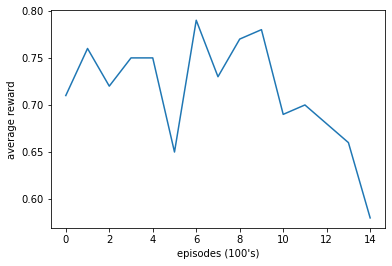

In [32]:
# plotting training progress

import matplotlib.pyplot as plt

def get_average(values):
    return sum(values) / len(values)

avg_rewards = []

for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i : i + 100]))
    
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()